# MPM Verification

In [16]:
# Import Matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

## Velocity Controlled (2D)

This element test has velocity constraint at the 4 nodes, the top going down and the bottom going up.


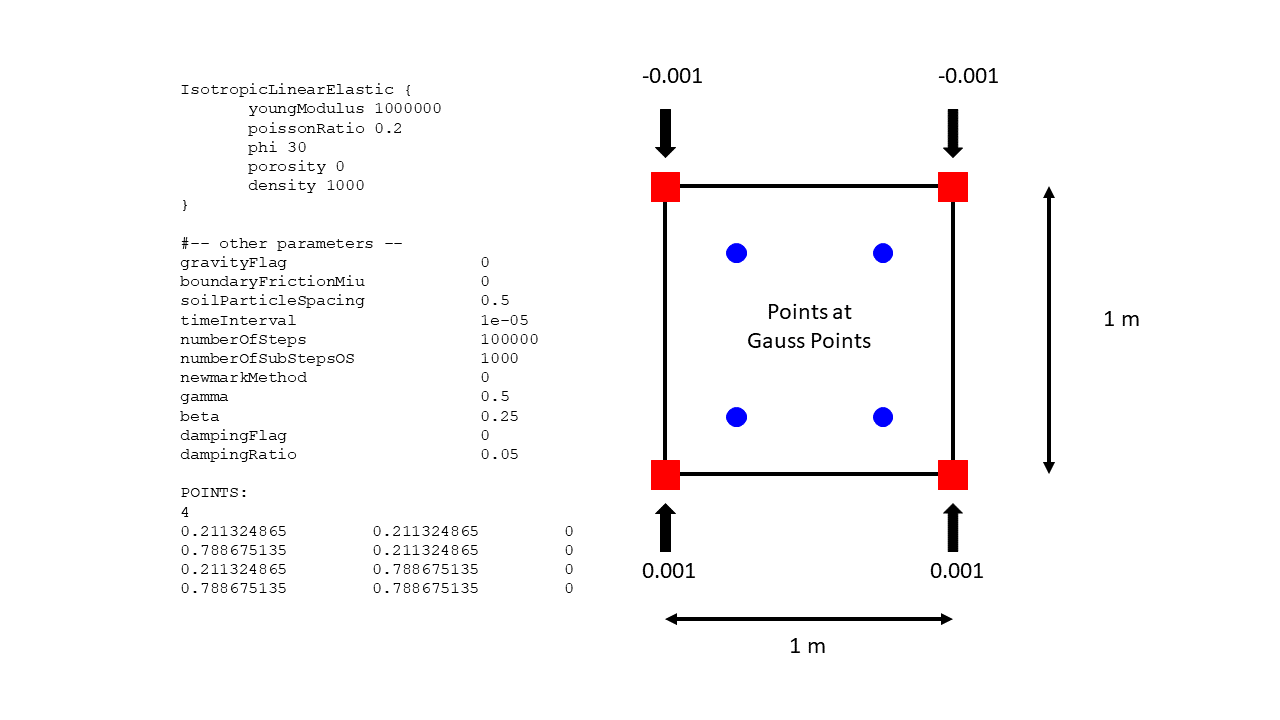

In [17]:
Image("Illustration.png")

In [18]:
# Getting more data

gauss_stress_0 = np.genfromtxt("gauss/stress_0.txt")
gauss_strain_0 = np.genfromtxt("gauss/strain_0.txt")
gauss_acceleration_0 = np.genfromtxt("gauss/acceleration_0.txt")
gauss_velocity_0 = np.genfromtxt("gauss/velocity_0.txt")

normal_stress_0 = np.genfromtxt("normal/stress_0.txt")
normal_strain_0 = np.genfromtxt("normal/strain_0.txt")
normal_acceleration_0 = np.genfromtxt("normal/acceleration_0.txt")
normal_velocity_0 = np.genfromtxt("normal/velocity_0.txt")


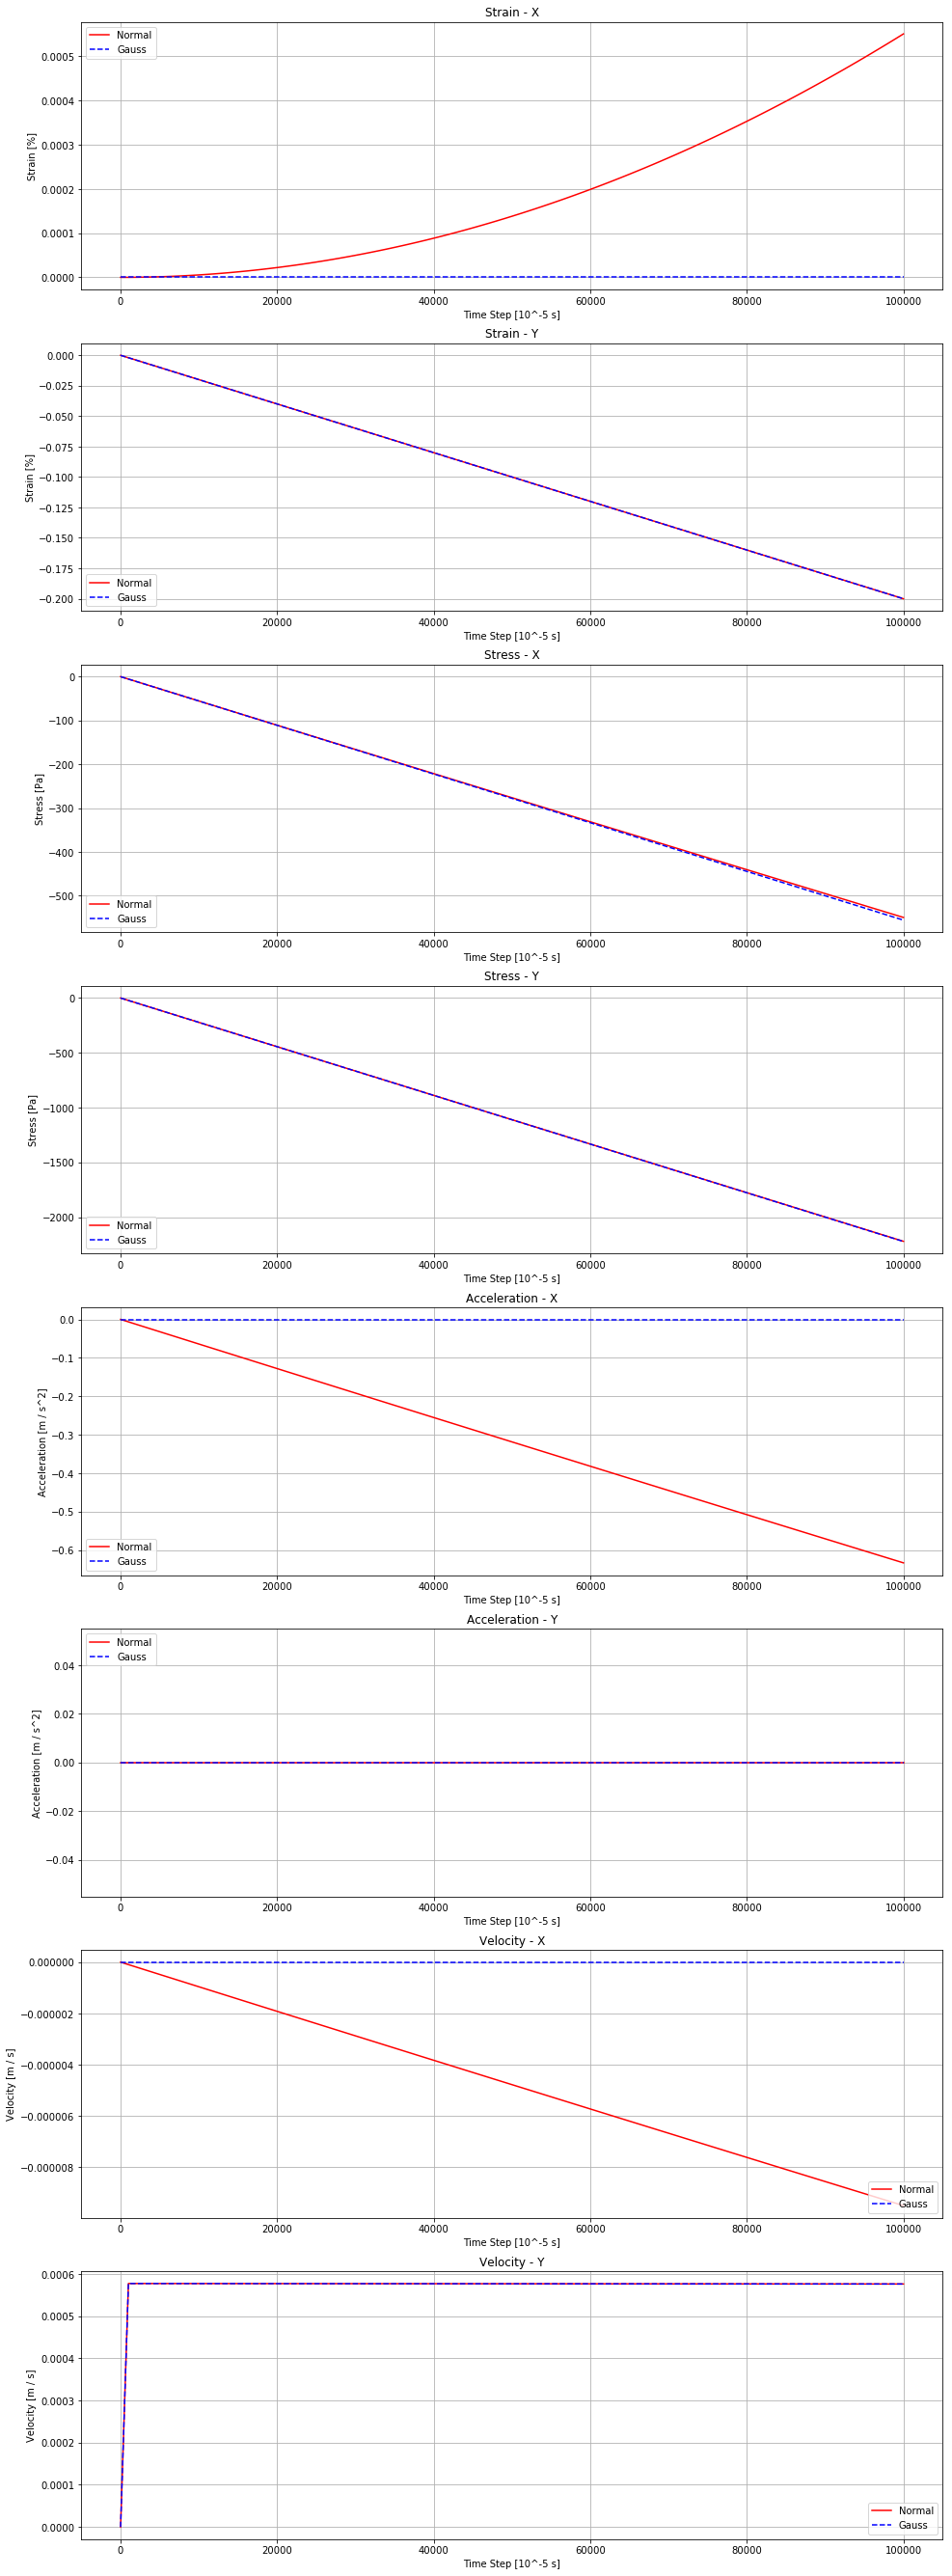

In [19]:
# Plot Comparison

plt.figure(figsize=(16,48))

plt.subplot(811)
plt.plot(normal_strain_0[:,0], normal_strain_0[:,1] * 100, 'r', label='Normal')
plt.plot(gauss_strain_0[:,0], gauss_strain_0[:,1] * 100, 'b--', label='Gauss')
#plt.axis([0, 100000, 0, 0.5])
plt.legend(loc='upper left')
plt.title('Strain - X')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Strain [%]')
plt.grid(True)

plt.subplot(812)
plt.plot(normal_strain_0[:,0], normal_strain_0[:,2] * 100, 'r', label='Normal')
plt.plot(gauss_strain_0[:,0], gauss_strain_0[:,2] * 100, 'b--', label='Gauss')
#plt.axis([0, 100000, -1, 0 ])
plt.legend(loc='lower left')
plt.title('Strain - Y')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Strain [%]')
plt.grid(True)

plt.subplot(813)
plt.plot(normal_stress_0[:,0], normal_stress_0[:,1], 'r', label='Normal')
plt.plot(gauss_stress_0[:,0], gauss_stress_0[:,1], 'b--', label='Gauss')
#plt.axis([0, 100000, 0, 0.5])
plt.legend(loc='lower left')
plt.title('Stress - X')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Stress [Pa]')
plt.grid(True)

plt.subplot(814)
plt.plot(normal_stress_0[:,0], normal_stress_0[:,2], 'r', label='Normal')
plt.plot(gauss_stress_0[:,0], gauss_stress_0[:,2], 'b--', label='Gauss')
#plt.axis([0, 100000, -1, 0 ])
plt.legend(loc='lower left')
plt.title('Stress - Y')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Stress [Pa]')
plt.grid(True)

plt.subplot(815)
plt.plot(normal_acceleration_0[:,0], normal_acceleration_0[:,1], 'r', label='Normal')
plt.plot(gauss_acceleration_0[:,0], gauss_acceleration_0[:,1], 'b--', label='Gauss')
#plt.axis([0, 100000, 0, 0.5])
plt.legend(loc='lower left')
plt.title('Acceleration - X')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Acceleration [m / s^2]')
plt.grid(True)

plt.subplot(816)
plt.plot(normal_acceleration_0[:,0], normal_acceleration_0[:,2], 'r', label='Normal')
plt.plot(gauss_acceleration_0[:,0], gauss_acceleration_0[:,2], 'b--', label='Gauss')
#plt.axis([0, 100000, -1, 0 ])
plt.legend(loc='upper left')
plt.title('Acceleration - Y')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Acceleration [m / s^2]')
plt.grid(True)

plt.subplot(817)
plt.plot(normal_velocity_0[:,0], normal_velocity_0[:,1], 'r', label='Normal')
plt.plot(gauss_velocity_0[:,0], gauss_velocity_0[:,1], 'b--', label='Gauss')
#plt.axis([0, 100000, 0, 0.5])
plt.legend(loc='lower right')
plt.title('Velocity - X')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Velocity [m / s]')
plt.grid(True)

plt.subplot(818)
plt.plot(normal_velocity_0[:,0], normal_velocity_0[:,2], 'r', label='Normal')
plt.plot(gauss_velocity_0[:,0], gauss_velocity_0[:,2], 'b--', label='Gauss')
#plt.axis([0, 100000, -1, 0 ])
plt.legend(loc='lower right')
plt.title('Velocity - Y')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Velocity [m / s]')
plt.grid(True)

plt.show()

Initial Position of the points at gauss points for better comparison:

- 0.211324865	0.211324865	0
- 0.788675135	0.211324865	0
- 0.211324865	0.788675135	0
- 0.788675135	0.788675135	0

Position at 1s with Original Scheme:

- 0.211183 0.211902 0.
- 0.788817 0.211902 0.
- 0.211183 0.788098 0.
- 0.788817 0.788098 0.

Position at 1s with Gauss Integration:

- 0.211325 0.211902 0.
- 0.788675 0.211902 0.
- 0.211325 0.788098 0.
- 0.788675 0.788098 0.

Here are the comparisons of theoretical and results from simulations with and gauss at 1 s:

|Items             | Theoretical  | MPM Normal   | MPM Gauss   |
|------------------|--------------|--------------|-------------|
|Ver Stress (kPa)  | -2222.22     | -2220.69     | -2222.22    |
|Hor Stress (kPa)  | -555.56      | -549.44      | -555.56     |

Thus, gauss integration helps this problem a little. I personally think that the zero (or close to zero) acceleration in horizontal (x) direction is what helping the gauss integration to perform better.